In [2]:
import pandas as pd

college = pd.read_csv("../data/College.csv")
college = college.rename({"Unnamed: 0": "College"}, axis=1)
college = college.set_index("College")
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


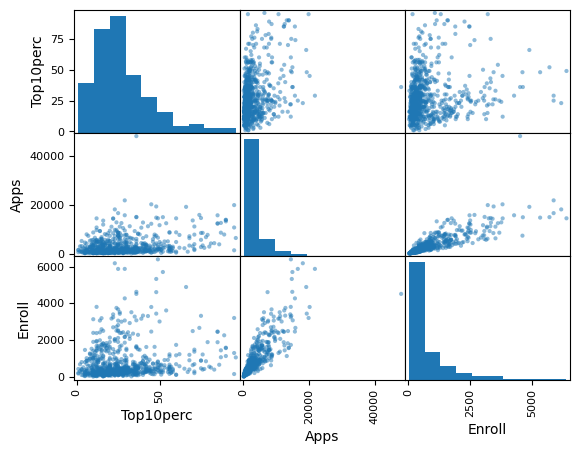

In [3]:
pd.plotting.scatter_matrix(college[['Top10perc', 'Apps', 'Enroll']]);

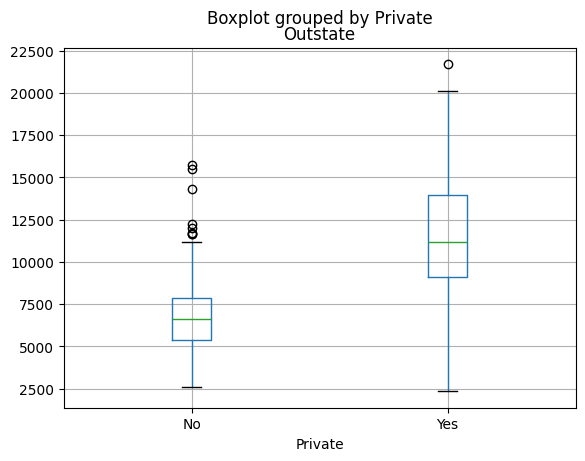

In [4]:
college.boxplot(column="Outstate", by="Private");

In [5]:
college['Elite'] = pd.cut(college['Top10perc'], [0, 50, 100], labels =['No', 'Yes'])
college['Elite'].value_counts()

Elite
No     699
Yes     78
Name: count, dtype: int64

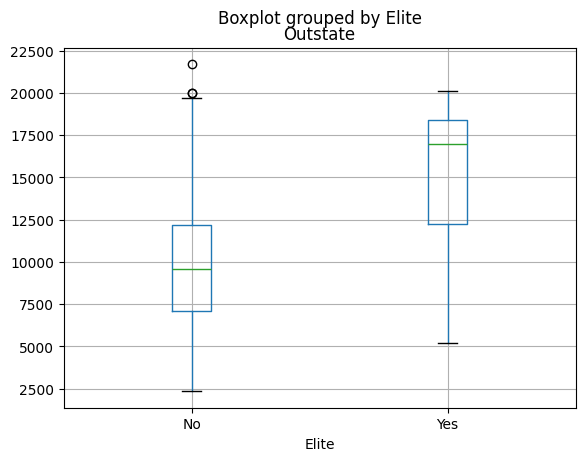

In [6]:
college.boxplot(column="Outstate", by="Elite");

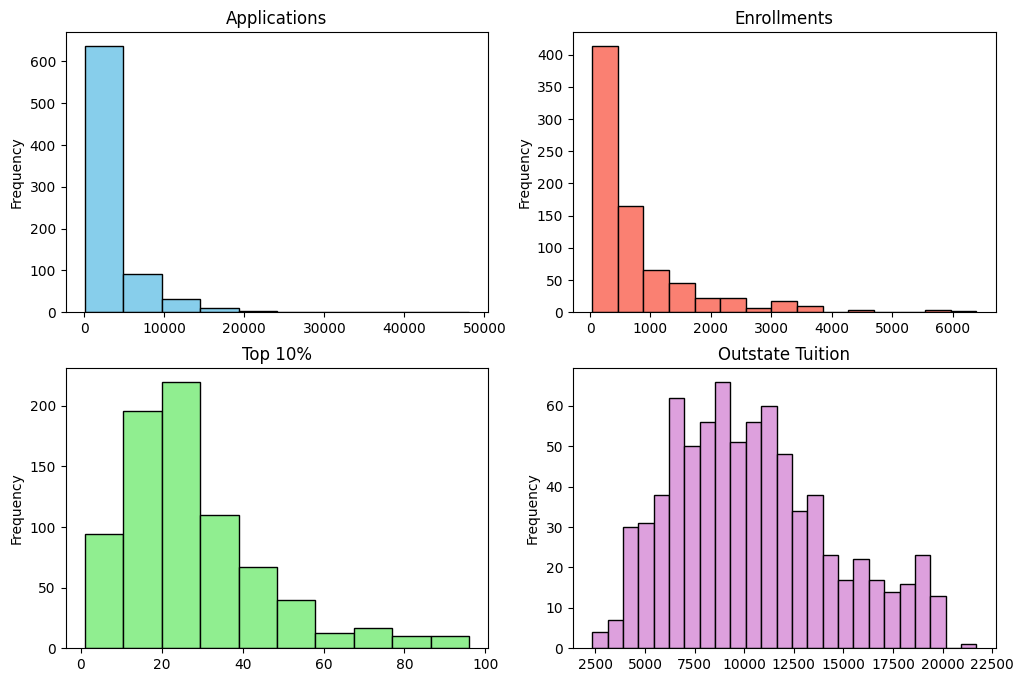

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

college['Apps'].plot.hist(bins=10, ax=ax[0,0], color='skyblue', edgecolor='black')
ax[0,0].set_title('Applications')

college['Enroll'].plot.hist(bins=15, ax=ax[0,1], color='salmon', edgecolor='black')
ax[0,1].set_title('Enrollments')

college['Top10perc'].plot.hist(bins=10, ax=ax[1,0], color='lightgreen', edgecolor='black')
ax[1,0].set_title('Top 10%')

college['Outstate'].plot.hist(bins=25, ax=ax[1,1], color='plum', edgecolor='black')
ax[1,1].set_title('Outstate Tuition')

plt.show();

Text(0, 0.5, 'Accept')

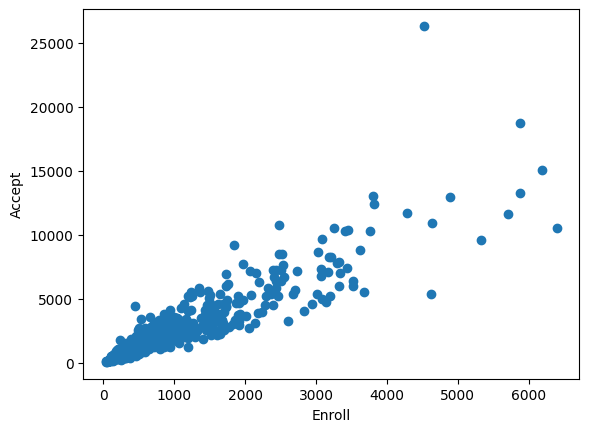

In [25]:
fig, ax = plt.subplots()
plt.plot(college["Enroll"], college["Accept"], 'o');
ax.set_xlabel("Enroll")
ax.set_ylabel("Accept")

The scatter plot of enrollment versus acceptances reveals a clear linear relationship between the two variables. Additionally, there is an outlier where a college accepts significantly more students relative to its enrollment.

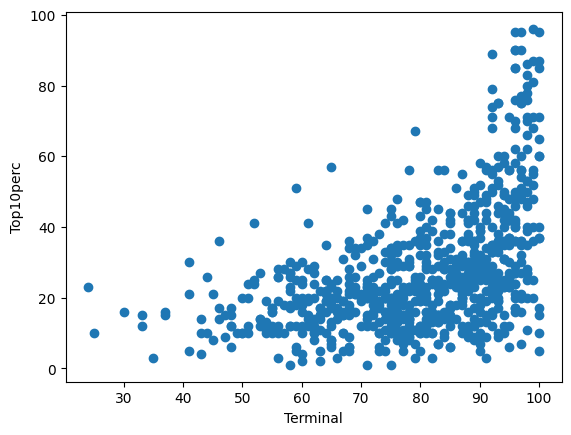

In [38]:
fig, ax = plt.subplots()
plt.plot(college["Terminal"], college["Top10perc"], 'o');
ax.set_xlabel("Terminal")
ax.set_ylabel("Top10perc");

The scatter plot shows a nonlinear, roughly exponential relationship between the percentage of faculty with terminal degrees and the proportion of students in the top 10%. This suggests that universities with more terminally qualified faculty tend to attract higher-achieving students.

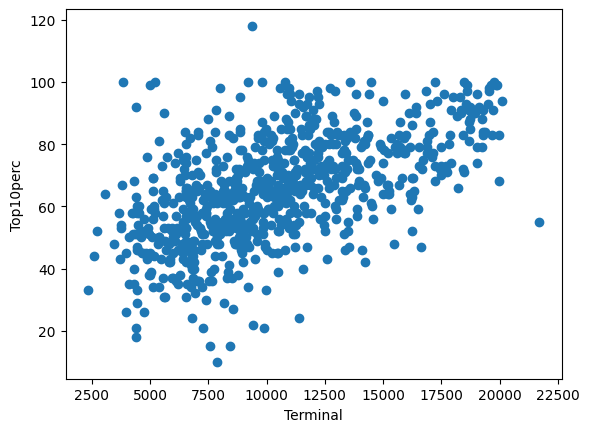

In [ ]:
fig, ax = plt.subplots()
plt.plot(college["Outstate"], college["Grad.Rate"], 'o');
ax.set_xlabel("Outstate")
ax.set_ylabel("Grad.Rate");

There is a rough linear relationship between out-of-state tuition and graduation rate, but with high variance. This suggests that, on average, colleges charging higher out-of-state tuition tend to have higher graduation rates, possibly reflecting better resources or selectivity. However, the wide spread indicates other factors also strongly influence graduation rates.

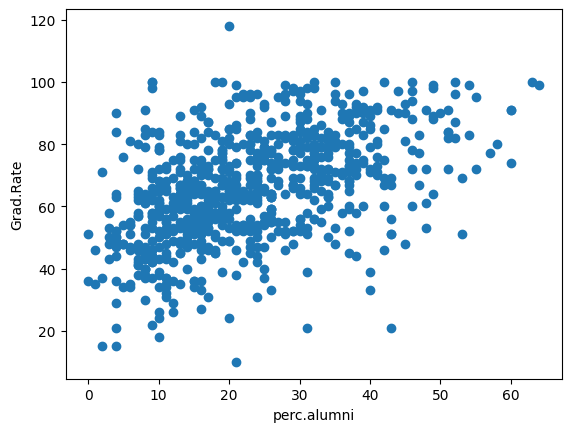

In [43]:
fig, ax = plt.subplots()
plt.plot(college["perc.alumni"], college["Grad.Rate"], 'o');
ax.set_xlabel("perc.alumni")
ax.set_ylabel("Grad.Rate");

There is a nonlinear relationship between the percentage of alumni who donate and the graduation rate, where graduation rates increase quickly with alumni giving up to a point, then stabilize. This suggests that beyond a certain level of alumni support, additional donations have less impact on improving graduation outcomes.